In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
texas_df = pd.read_csv("redfin_texas_counties.csv")

# Display sample data
texas_df.head()

,Unnamed: 0,period_begin,period_end,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,...,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,county
0,139,2012-01-01,2012-01-31,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,152500.0,0.155303,...,0.043478,-0.164855,-0.096307,0.400000,-0.400000,0.066667,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
1,299,2019-05-01,2019-05-31,"Williamson County, TX",Texas,TX,Condo/Co-op,3,237000.0,0.013904,...,0.212766,-0.187234,-0.103024,0.571429,-0.211180,0.071429,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
2,474,2019-06-01,2019-06-30,"Williamson County, TX",Texas,TX,Single Family Residential,6,291000.0,-0.029863,...,0.336561,0.040325,-0.032895,0.505759,-0.006931,0.056208,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
3,505,2012-04-01,2012-04-30,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,154950.0,0.029568,...,0.113636,-0.021499,-0.069462,0.571429,0.171429,0.428571,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
4,1400,2015-08-01,2015-08-31,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,219000.0,0.120205,...,NaN,NaN,NaN,0.777778,0.215278,0.777778,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County


In [3]:
texas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2573 non-null   int64  
 1   period_begin                    2573 non-null   object 
 2   period_end                      2573 non-null   object 
 3   region                          2573 non-null   object 
 4   state                           2573 non-null   object 
 5   state_code                      2573 non-null   object 
 6   property_type                   2573 non-null   object 
 7   property_type_id                2573 non-null   int64  
 8   median_sale_price               2573 non-null   float64
 9   median_sale_price_mom           2462 non-null   float64
 10  median_sale_price_yoy           2450 non-null   float64
 11  median_list_price               2485 non-null   float64
 12  median_list_price_mom           23

In [4]:
#narrow down dataframe to include only relevant columns
clean_df = texas_df[['period_begin', 'period_end', 'region', 'property_type', 'median_sale_price', 'sold_above_list']]

# ALL RESIDENTIAL Filter
clean_df = clean_df.loc[(clean_df['property_type'] == 'All Residential')]

#Creating a year column.  
clean_df['year'] = pd.DatetimeIndex(clean_df['period_end']).year

# Let's make sure 'date' is actually a date in pandas
clean_df["date"] = pd.to_datetime(clean_df["period_end"])

clean_df

,period_begin,period_end,region,property_type,median_sale_price,sold_above_list,year,date
5,2018-12-01,2018-12-31,"Williamson County, TX",All Residential,275000.0,0.127148,2018,2018-12-31
9,2016-04-01,2016-04-30,"Bastrop County, TX",All Residential,213000.0,0.131148,2016,2016-04-30
15,2018-11-01,2018-11-30,"Caldwell County, TX",All Residential,177000.0,0.230769,2018,2018-11-30
16,2015-04-01,2015-04-30,"Caldwell County, TX",All Residential,170000.0,0.238095,2015,2015-04-30
25,2012-11-01,2012-11-30,"Williamson County, TX",All Residential,183060.0,0.141856,2012,2012-11-30
...,...,...,...,...,...,...,...,...
2561,2014-09-01,2014-09-30,"Travis County, TX",All Residential,274028.5,0.224964,2014,2014-09-30
2562,2021-07-01,2021-07-31,"Travis County, TX",All Residential,551250.0,0.691837,2021,2021-07-31
2563,2012-07-01,2012-07-31,"Hays County, TX",All Residential,202000.0,0.092166,2012,2012-07-31
2565,2012-12-01,2012-12-31,"Hays County, TX",All Residential,190000.0,0.098160,2012,2012-12-31


In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 5 to 2569
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   period_begin       650 non-null    object        
 1   period_end         650 non-null    object        
 2   region             650 non-null    object        
 3   property_type      650 non-null    object        
 4   median_sale_price  650 non-null    float64       
 5   sold_above_list    650 non-null    float64       
 6   year               650 non-null    int64         
 7   date               650 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 45.7+ KB


In [6]:
#Filter on #2018-2022
years = [2018, 2019, 2020, 2021, 2022]
clean_df = clean_df.loc[clean_df['year'].isin(years)]

clean_df = clean_df.sort_values('period_end')

clean_df

,period_begin,period_end,region,property_type,median_sale_price,sold_above_list,year,date
887,2018-01-01,2018-01-31,"Williamson County, TX",All Residential,266277.5,0.183502,2018,2018-01-31
1990,2018-01-01,2018-01-31,"Hays County, TX",All Residential,262000.0,0.151832,2018,2018-01-31
1473,2018-01-01,2018-01-31,"Bastrop County, TX",All Residential,272000.0,0.089286,2018,2018-01-31
483,2018-01-01,2018-01-31,"Caldwell County, TX",All Residential,183000.0,0.043478,2018,2018-01-31
1348,2018-01-01,2018-01-31,"Travis County, TX",All Residential,325505.0,0.139369,2018,2018-01-31
...,...,...,...,...,...,...,...,...
651,2022-10-01,2022-10-31,"Williamson County, TX",All Residential,460000.0,0.160000,2022,2022-10-31
1555,2022-10-01,2022-10-31,"Bastrop County, TX",All Residential,382641.5,0.205882,2022,2022-10-31
2254,2022-10-01,2022-10-31,"Hays County, TX",All Residential,408000.0,0.183946,2022,2022-10-31
1500,2022-10-01,2022-10-31,"Caldwell County, TX",All Residential,322587.5,0.125000,2022,2022-10-31


In [7]:
clean_df

,period_begin,period_end,region,property_type,median_sale_price,sold_above_list,year,date
887,2018-01-01,2018-01-31,"Williamson County, TX",All Residential,266277.5,0.183502,2018,2018-01-31
1990,2018-01-01,2018-01-31,"Hays County, TX",All Residential,262000.0,0.151832,2018,2018-01-31
1473,2018-01-01,2018-01-31,"Bastrop County, TX",All Residential,272000.0,0.089286,2018,2018-01-31
483,2018-01-01,2018-01-31,"Caldwell County, TX",All Residential,183000.0,0.043478,2018,2018-01-31
1348,2018-01-01,2018-01-31,"Travis County, TX",All Residential,325505.0,0.139369,2018,2018-01-31
...,...,...,...,...,...,...,...,...
651,2022-10-01,2022-10-31,"Williamson County, TX",All Residential,460000.0,0.160000,2022,2022-10-31
1555,2022-10-01,2022-10-31,"Bastrop County, TX",All Residential,382641.5,0.205882,2022,2022-10-31
2254,2022-10-01,2022-10-31,"Hays County, TX",All Residential,408000.0,0.183946,2022,2022-10-31
1500,2022-10-01,2022-10-31,"Caldwell County, TX",All Residential,322587.5,0.125000,2022,2022-10-31


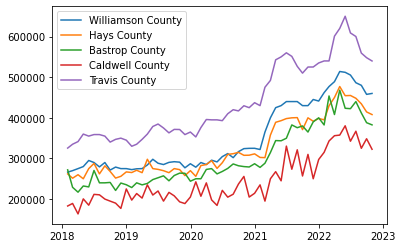

In [8]:
w = clean_df.loc[(clean_df['region'] == 'Williamson County, TX')]
h=clean_df.loc[(clean_df['region'] == 'Hays County, TX')]
b=clean_df.loc[(clean_df['region'] == 'Bastrop County, TX')]
c=clean_df.loc[(clean_df['region'] == 'Caldwell County, TX')]
t=clean_df.loc[(clean_df['region'] == 'Travis County, TX')]
plt.plot(w['date'], w['median_sale_price'], label = 'Williamson County')
plt.plot(h['date'], h['median_sale_price'], label = 'Hays County')
plt.plot(b['date'], b['median_sale_price'], label = 'Bastrop County')
plt.plot(c['date'], c['median_sale_price'], label = 'Caldwell County')
plt.plot(t['date'], t['median_sale_price'], label = 'Travis County')
plt.legend()

plt.show()

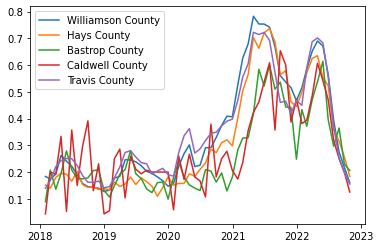

In [9]:
w = clean_df.loc[(clean_df['region'] == 'Williamson County, TX')]
w_above = w.groupby(['date'])['sold_above_list'].sum()
w_above_df = pd.DataFrame(w_above)
w_above_df.reset_index(inplace=True)
w_above_df
h=clean_df.loc[(clean_df['region'] == 'Hays County, TX')]
h_above = h.groupby(['date'])['sold_above_list'].sum()
h_above_df = pd.DataFrame(h_above)
h_above_df.reset_index(inplace=True)
h_above_df
b=clean_df.loc[(clean_df['region'] == 'Bastrop County, TX')]
b_above = b.groupby(['date'])['sold_above_list'].sum()
b_above_df = pd.DataFrame(b_above)
b_above_df.reset_index(inplace=True)
b_above_df
c=clean_df.loc[(clean_df['region'] == 'Caldwell County, TX')]
c_above = c.groupby(['date'])['sold_above_list'].sum()
c_above_df = pd.DataFrame(c_above)
c_above_df.reset_index(inplace=True)
c_above_df
t=clean_df.loc[(clean_df['region'] == 'Travis County, TX')]
t_above = t.groupby(['date'])['sold_above_list'].sum()
t_above_df = pd.DataFrame(t_above)
t_above_df.reset_index(inplace=True)
t_above_df

plt.plot(w_above_df['date'], w_above_df['sold_above_list'], label = 'Williamson County')
plt.plot(h_above_df['date'], h_above_df['sold_above_list'], label = 'Hays County')
plt.plot(b_above_df['date'], b_above_df['sold_above_list'], label = 'Bastrop County')
plt.plot(c_above_df['date'], c_above_df['sold_above_list'], label = 'Caldwell County')
plt.plot(t_above_df['date'], t_above_df['sold_above_list'], label = 'Travis County')
plt.legend()
#plt.plot(above_df['date'], above_df['sold_above_list'])
plt.show()

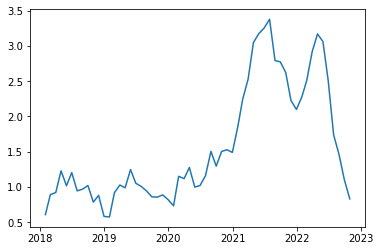

In [10]:
above = clean_df.groupby(['date'])['sold_above_list'].sum()
above_df = pd.DataFrame(above)
above_df.reset_index(inplace=True)
above_df

plt.plot(above_df['date'], above_df['sold_above_list'])
plt.show()

## this grap is give the sum of the percent sold above list price - so at the height it is giving over 300% because it is adding data from all 5 counties

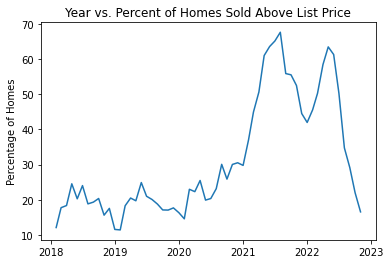

In [11]:
# this one is giving the mean of the counties instead of the sum
above = clean_df.groupby(['date'])['sold_above_list'].mean()
above_df = pd.DataFrame(above)
above_df.reset_index(inplace=True)
#this code didn't work:     #above_df.style.format({'sold_above_list':'{:, .2%}'.format})

above_df['sold_above_list'] = above_df['sold_above_list'] * 100
above_df['sold_above_list'] = above_df['sold_above_list'].round(2)
above_df

plt.plot(above_df['date'], above_df['sold_above_list'])
plt.ylabel('Percentage of Homes')
plt.title('Year vs. Percent of Homes Sold Above List Price')
plt.show()

##I think this is the most accurate of the above graph trials

Looking at next thing

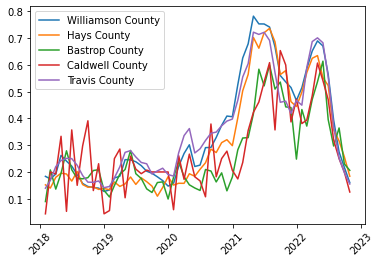

In [15]:
w = clean_df.loc[(clean_df['region'] == 'Williamson County, TX')]
h=clean_df.loc[(clean_df['region'] == 'Hays County, TX')]
b=clean_df.loc[(clean_df['region'] == 'Bastrop County, TX')]
c=clean_df.loc[(clean_df['region'] == 'Caldwell County, TX')]
t=clean_df.loc[(clean_df['region'] == 'Travis County, TX')]
plt.plot(w['date'], w['sold_above_list'], label = 'Williamson County')
plt.plot(h['date'], h['sold_above_list'], label = 'Hays County')
plt.plot(b['date'], b['sold_above_list'], label = 'Bastrop County')
plt.plot(c['date'], c['sold_above_list'], label = 'Caldwell County')
plt.plot(t['date'], t['sold_above_list'], label = 'Travis County')
plt.legend()

plt.xticks(rotation = 45)
plt.show()

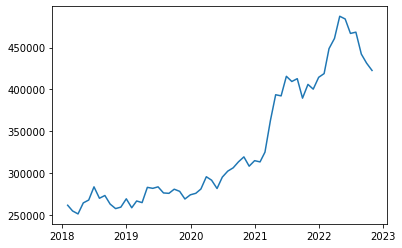

In [13]:
# trying the same with the median sale price
sale_price = clean_df.groupby(['date'])['median_sale_price'].mean()
sale_price_df = pd.DataFrame(sale_price)
sale_price_df.reset_index(inplace=True)
sale_price_df

plt.plot(sale_price_df['date'], sale_price_df['median_sale_price'])
plt.show()


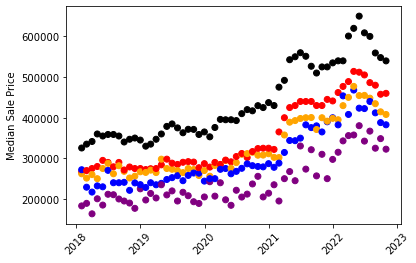

In [14]:
colors = {'Williamson County, TX': 'red', 'Hays County, TX': 'orange', 'Bastrop County, TX': 'blue', 'Caldwell County, TX': 'purple', 'Travis County, TX': 'black'}

plt.scatter(clean_df['date'], clean_df['median_sale_price'], c=clean_df['region'].map(colors))
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 45)
plt.show()